In [2]:
get_ipython().magic('matplotlib inline')

import matplotlib.pyplot as plt
from collections import Counter
from collections import OrderedDict
import seaborn as sns
from collections import defaultdict
import networkx as nx
import os
import json
import numpy as np

dropbox_path = "/Users/s1743989/VirusEvolution Dropbox/Verity Hill/Agent_based_model/"

# with open("../../Contact_structure/Household_clusters_testv2.txt") as json_file:
#     hh_clusters = json.load(json_file)

#district_list = ["District0", "District1","District2","District3","District4","District5","District6","District7","District8","District9"]





In [3]:
with open("../../Contact_structure/hh_clusters.txt") as json_file:
    hh_clusters = json.load(json_file)
    




In [4]:
district_list = ["bo", 'bombali', 'bonthe', 'kailahun', 'kambia', 'kenema', 'koinadugu', 'kono', 'moyamba', 'portloko',
                'pujehun', 'tonkolili', 'westernarearural', 'westernareaurban']

In [4]:
# pairs = open(dropbox_path + "Looping models/Results/transmission_pairs.csv")

def prep(directory,file_name):

    transmission_dict = {}
    hh_dict = {}
    dist_dict = {}
    dist_present = []
    edge_list = []
    case_list = []
    parent_list = []
    hh_set = set()
    
    transm_time = {}
    
    district_mvmts = defaultdict(list)

    sec_cases = defaultdict(list)

    with open(dropbox_path + "Looping models/Results/" + directory + file_name, 'r') as f:
        next(f)
        for l in f: 
            cols = l.strip("\n").split(",")
            case = cols[0]
            parent = cols[1]
            if parent != "NA":
                transmission_dict[case] = parent
                edge_list.append((parent,case))
            elif parent == "NA":
                index_case = case
                index_district = cols[3]
                

            hh_dict[case] = cols[2]
            dist_dict[case] = cols[3]
            case_list.append(case)
            parent_list.append(parent)
            hh_set.add(cols[2])
            sec_cases[parent].append(case)
            
            transm_time[case] = cols[4]

    for item1 in district_list:
        for item2 in district_list:
            if item1 != item2:
                district_mvmts[item1,item2] = []


            
    for district in dist_dict.values():
        dist_present.append(district)

    return [transmission_dict, hh_dict, dist_dict, dist_present, edge_list, case_list, parent_list, hh_set, index_case, index_district, district_mvmts, transm_time]
    

In [5]:
def dist_jumps(transmission_dict, dist_dict, district_mvmts, transm_time):

    district_jumps = 0

    for case, parent in transmission_dict.items():
        if dist_dict[case] != dist_dict[parent]:
            district_jumps += 1
            district_mvmts[dist_dict[parent], dist_dict[case]].append(transm_time[case])

    return district_jumps, district_mvmts

In [6]:
def hh_jumps(transmission_dict,hh_dict, hh_set):

    hh_jumps = 0

    for case, parent in transmission_dict.items():
        if hh_dict[case] != hh_dict[parent]:
            hh_jumps += 1

    return hh_jumps, len(hh_set)

In [7]:
def district_dist(dist_present):

    #This isn't working the way it should be in terms of the x axis
    district_counter = Counter()

    for item in district_list:
        if item not in dist_present:
            district_counter[item] = 0

    for place in dist_present:
        district_counter[place] += 1

    #print(district_counter)

    x = []
    y = []
    
    districts = list(district_counter.keys())
    freq = list(district_counter.values())
    
    index = np.arange(len(districts))
    
    plt.bar(index, freq)
    plt.xticks(index, districts, fontsize = 10, rotation = 90)
    
    plt.show()

In [8]:
def network(case_list, edge_list):
    
    G = nx.Graph()

    G.add_nodes_from(case_list)
    G.add_edges_from(edge_list)

#     nx.draw(G)
#     plt.savefig("first_network.png")
#     plt.show()
    
    return G

In [9]:
def deg_centr(G):

    D = nx.degree_centrality(G)

    degree_count = Counter()

    for measure in D.values():
        rounded = round(measure, 10)
        degree_count[rounded] += 1

    x = []
    y = []

    for key, value in degree_count.items():
        x.append(key)
        y.append(value)


    plt.scatter(x,y)

    plt.show()

In [10]:
#cluster jumping
def cluster_mvmt(transmission_dict, hh_dict, hh_clusters):

    cluster_jump = 0
    cluster_num = 1
    within_cluster_jump = 0

    for case, parent in transmission_dict.items():

        if hh_dict[case] not in hh_clusters[hh_dict[parent]] and hh_dict[case] != hh_dict[parent]:
            cluster_jump += 1
            cluster_num += 1
        
        elif hh_dict[case] in hh_clusters[hh_dict[parent]] and hh_dict[case] != hh_dict[parent]:
            within_cluster_jump += 1
            
            
    return int(cluster_jump), int(cluster_num), int(within_cluster_jump)

## For a single file
            
            


In [11]:
count = 0

fw = open("log_files/real_data/subset_pairs_large.csv", 'w')

with open("log_files/real_data/pairs1.csv") as f:
    for l in f:
        count += 1
        if count < 15000:
            fw.write(l)
        else:
            break
            
fw.close()

FileNotFoundError: [Errno 2] No such file or directory: 'log_files/real_data/subset_pairs_large.csv'

In [12]:
def prep_single(file_name):

    transmission_dict = {}
    hh_dict = {}
    dist_dict = {}
    dist_present = []
    edge_list = []
    case_list = []
    parent_list = []
    hh_set = set()

    sec_cases = defaultdict(list)
    district_mvmts = defaultdict(list)
    transm_time = {}

    with open(dropbox_path + "Looping models/Results/" + file_name, 'r') as f:
        next(f)
        for l in f: 
            cols = l.strip("\n").split(",")
            case = cols[0]
            parent = cols[1]
            if parent != "NA":
                transmission_dict[case] = parent
                edge_list.append((parent,case))
            elif parent == "NA":
                index_case = case
                index_district = cols[3]
                
            hh_dict[case] = cols[2]
            dist_dict[case] = cols[3]
            case_list.append(case)
            parent_list.append(parent)
            hh_set.add(cols[2])
            sec_cases[parent].append(case)
            
            transm_time[case] = cols[4]
            
    for item1 in district_list:
        for item2 in district_list:
            if item1 != item2:
                district_mvmts[item1,item2] = []

    for district in dist_dict.values():
        dist_present.append(district)

    return [transmission_dict, hh_dict, dist_dict, dist_present, edge_list, case_list, parent_list, hh_set, index_case, index_district, district_mvmts, transm_time]

In [17]:
def epicurve(file):
    
    len_list = []
    days = []
    day_list = range(0,2000)
    day_dict = defaultdict(list)
    
    count = 0
    count2 = 0
    week_number = 0
    new_cases = 0
    case_list = []
    week_list = []

    with open(dropbox_path + "Looping models/Results/" + file, 'r') as f:
        next(f)
        for l in f:
            tokens = l.strip("\n").split(",")
            person = tokens[0]
            day = int(tokens[5]) #Date of onset
            
            day_dict[day].append(person)
            
    #print(day_dict.keys())

    for item in day_list:
        if item not in day_dict.keys():
            day_dict[item] = []
            
    day_dict[0] = [1]
    
    new_daydict = OrderedDict(sorted(day_dict.items(), key = lambda t:t[0]))
    
    #print(new_daydict)
    
    for k,i in new_daydict.items():
        len_list.append(len(i))
        days.append(k)

    for i in len_list:
        count += 1
        new_cases += i
        if count % 7 == 0:
            case_list.append(new_cases)
            new_cases = 0

    for j in days:
        count2 += 1
        if count2 % 7 == 0:
            week_number += 1
            week_list.append(week_number)

    # print(len(case_list))
    # print(len(week_list))       

    x = week_list[:2500]
    y = case_list[:2500]

    # print(case_list)

    #print(x)
    # plt.plot(x,y)
    
    plt.title("Number of new cases per week")
    plt.xlabel("Week number")
    plt.ylabel("New cases")
    plt.plot(x, y)
    plt.show()   

In [18]:
def single_file_analysis(file):

    household_average_calc = []
    index_case_check = []
    index_dist_check = []
    between_cluster_dist = []
    cluster_average = []
    sizes = []
    within_cluster_dist = []

    output = prep_single(file)
    
    if len(output[0]) > 1:
    #print(output)
        #print("New File")
        
        

        district_info = dist_jumps(output[0],output[2], output[10], output[11])
        
        household_jumps = hh_jumps(output[0], output[1], output[7])

        cluster_jump = cluster_mvmt(output[0], output[1], hh_clusters)


        print("Total cases = " + str(len(output[0]) + 1))
        print("Number of district jumps = " + str(district_info[0]))
        #print("Number of household jumps = " + str(household_jumps[0]))
        print("Number of households involved = " + str(household_jumps[1]))
        print("Number of cases per household = " + str((len(output[0]) + 1) / household_jumps[1]))
        print("Number of cases per three-hh cluster = " + str((len(output[0]) + 1)/cluster_jump[1]))

        household_average_calc.append((len(output[0]) + 1) / household_jumps[1])

        between_cluster_dist.append(cluster_jump[0])
        cluster_average.append((len(output[0]) + 1)/cluster_jump[1])

        within_cluster_dist.append(cluster_jump[2])

        sizes.append(len(output[0]) + 1)

        distr_dist = district_dist(output[3])
        network_output = network(output[5], output[4])
        centrality  = deg_centr(network_output)

        index_case_check.append(output[8])
        index_dist_check.append(output[9])
        
        epicurve(file)
        
#         for key,value in district_info[1].items():
#             if len(value) != 0:
#                 print(key, value)
        



Total cases = 1458800
Number of district jumps = 59683
Number of households involved = 464161
Number of cases per household = 3.1428749938060285
Number of cases per three-hh cluster = 3.479156779084992


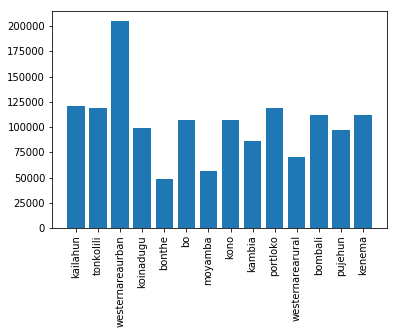

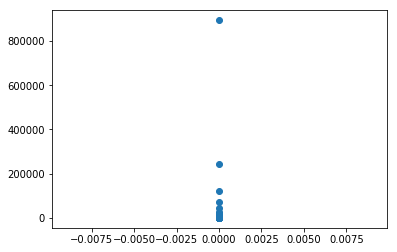

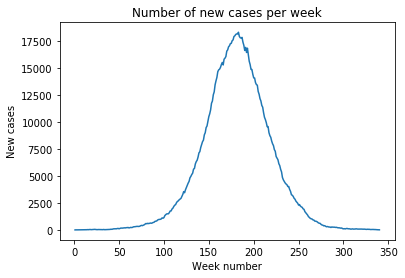

In [19]:
prep_single("no_caps/from_server/information_file_for_0.csv")
single_file_analysis("no_caps/from_server/information_file_for_0.csv")

Total cases = 2686
Number of district jumps = 393
Number of households involved = 2678
Number of cases per household = 1.0029873039581778
Number of cases per three-hh cluster = 1.0


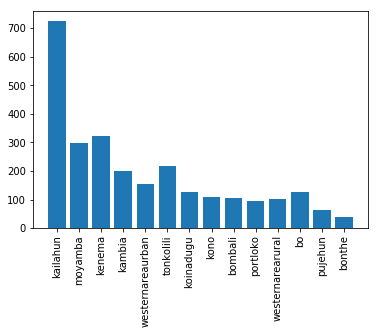

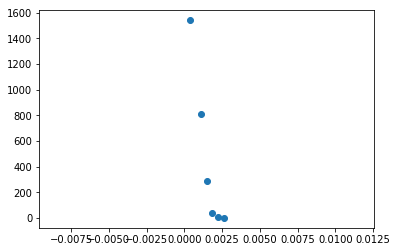

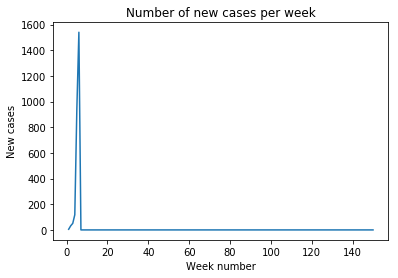

('bo', 'bonthe') ['35', '35']
('bo', 'kailahun') ['30', '35']
('bo', 'kambia') ['35']
('bo', 'kenema') ['30', '35']
('bo', 'koinadugu') ['30', '35']
('bo', 'moyamba') ['35', '35', '35']
('bo', 'pujehun') ['35']
('bo', 'westernarearural') ['35', '35', '35']
('bo', 'westernareaurban') ['35']
('bombali', 'bo') ['30', '30', '35', '35', '35', '35']
('bombali', 'bonthe') ['35']
('bombali', 'kailahun') ['20']
('bombali', 'kambia') ['30', '35', '35', '35']
('bombali', 'kenema') ['35']
('bombali', 'kono') ['35', '35']
('bombali', 'moyamba') ['35']
('bombali', 'pujehun') ['35', '35']
('bombali', 'tonkolili') ['35']
('bombali', 'westernarearural') ['30']
('bombali', 'westernareaurban') ['35']
('bonthe', 'kono') ['35']
('bonthe', 'moyamba') ['35']
('kailahun', 'bo') ['20', '25', '30', '30', '30', '30', '30', '30', '35']
('kailahun', 'bombali') ['15', '25', '25', '30', '30', '35', '35', '35', '35']
('kailahun', 'bonthe') ['30', '35', '35', '35', '35', '35', '35']
('kailahun', 'kambia') ['20', '25',

In [18]:
prep_single("Fixed_trees/Multiple_clusters/information_file_for_0.csv")
single_file_analysis("Fixed_trees/Multiple_clusters/information_file_for_0.csv")

Total cases = 24448
Number of district jumps = 122
Number of households involved = 5524
Number of cases per household = 4.425778421433743
Number of cases per three-hh cluster = 10.110835401157981


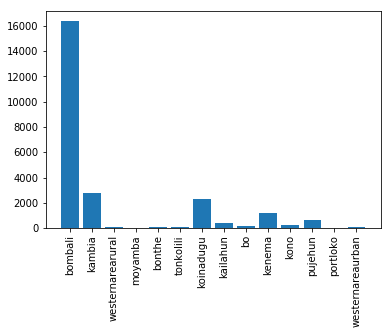

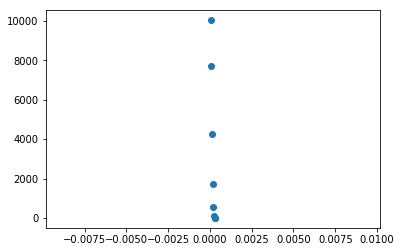

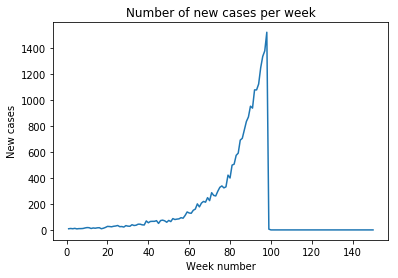

In [129]:
prep_single("../optimisingtestpairs.csv")
single_file_analysis("../optimisingtestpairs.csv")



## For complete simulations

In [ ]:
for file in os.listdir("log_files/real_data/"):
    if file != ".DS_store":
        print(file)
        count = 0
        with open("log_files/real_data/" + file) as f:
            for l in f:
                count += 1
        if count > 20:
            print(file)
            print(count)

In [120]:
def simulation_run(directory):

    household_average_calc = []
    index_case_check = []
    index_dist_check = []
    between_cluster_dist = []
    cluster_average = []
    sizes = []
    within_cluster_dist = []

    for file in os.listdir(directory):
        if file != ".DS_Store":
            count = 0
            with open(directory + file) as f:
                output = prep(directory, file)
                if len(output[0]) > 1:
                #print(output)
                    #print("New File")

                    district_jumps = dist_jumps(output[0],output[2])
                    household_jumps = hh_jumps(output[0], output[1], output[7])

                    cluster_jump = cluster_mvmt(output[0], output[1], hh_clusters)

                    print("Total cases = " + str(len(output[0]) + 1))
                    print("Number of district jumps = " + str(district_jumps))
                    #print("Number of household jumps = " + str(household_jumps[0]))
                    print("Number of households involved = " + str(household_jumps[1]))
                    print("Number of cases per household = " + str((len(output[0]) + 1) / household_jumps[1]))

                    household_average_calc.append((len(output[0]) + 1) / household_jumps[1])

                    between_cluster_dist.append(cluster_jump[0])
                    cluster_average.append((len(output[0]) + 1)/cluster_jump[1])

                    within_cluster_dist.append(cluster_jump[2])

                    sizes.append(len(output[0]) + 1)

                    distr_dist = district_dist(output[3])
#                     network_output = network(output[5], output[4])
#                     centrality  = deg_centr(network_output)

                    index_case_check.append(output[8])
                    index_dist_check.append(output[9])

            

Total cases = 26
Number of district jumps = 0
Number of households involved = 3
Number of cases per household = 8.666666666666666


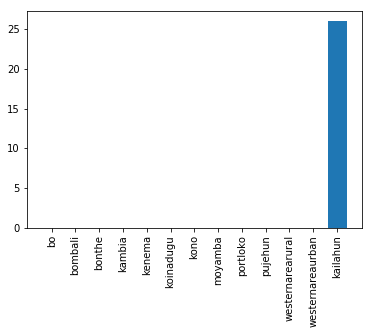

Total cases = 22
Number of district jumps = 0
Number of households involved = 3
Number of cases per household = 7.333333333333333


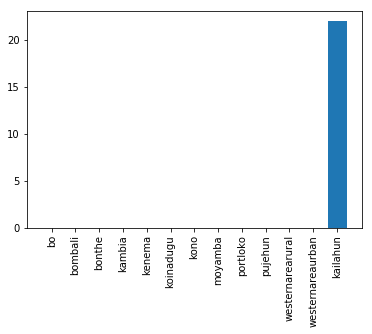

Total cases = 3
Number of district jumps = 0
Number of households involved = 3
Number of cases per household = 1.0


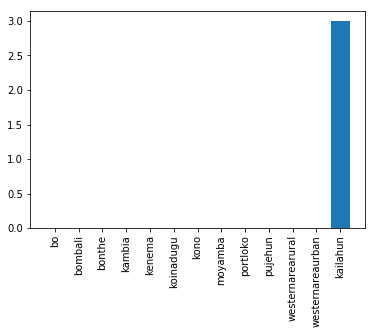

Total cases = 25
Number of district jumps = 0
Number of households involved = 3
Number of cases per household = 8.333333333333334


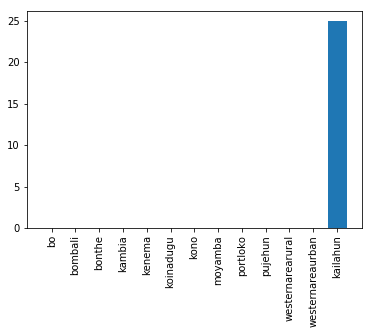

Total cases = 27
Number of district jumps = 0
Number of households involved = 3
Number of cases per household = 9.0


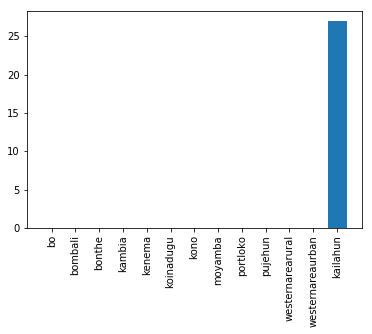

Total cases = 36
Number of district jumps = 0
Number of households involved = 6
Number of cases per household = 6.0


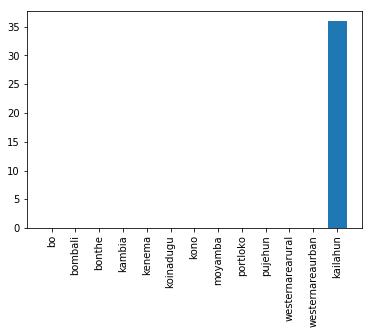

Total cases = 53
Number of district jumps = 0
Number of households involved = 6
Number of cases per household = 8.833333333333334


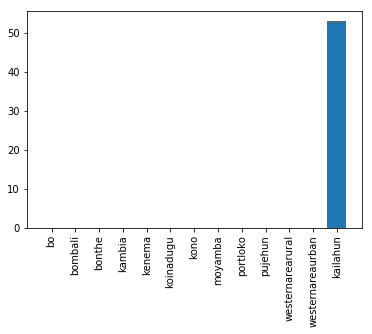

Total cases = 86
Number of district jumps = 0
Number of households involved = 12
Number of cases per household = 7.166666666666667


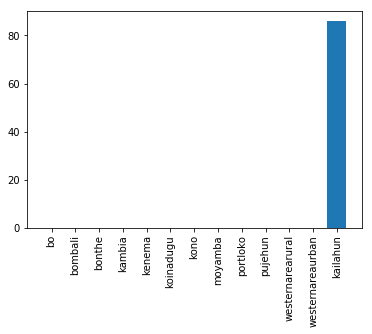

Total cases = 17
Number of district jumps = 0
Number of households involved = 3
Number of cases per household = 5.666666666666667


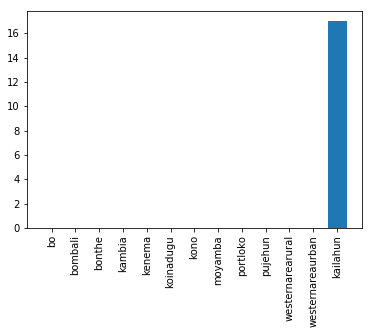

Total cases = 29
Number of district jumps = 0
Number of households involved = 3
Number of cases per household = 9.666666666666666


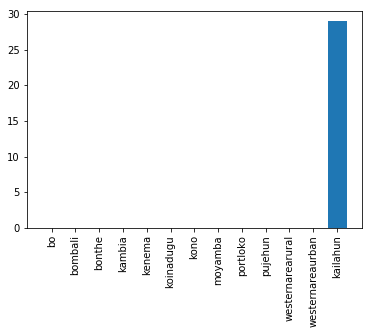

Total cases = 20
Number of district jumps = 0
Number of households involved = 3
Number of cases per household = 6.666666666666667


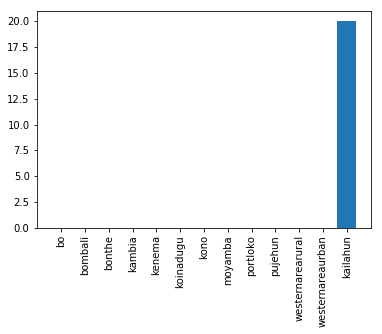

Total cases = 30
Number of district jumps = 0
Number of households involved = 3
Number of cases per household = 10.0


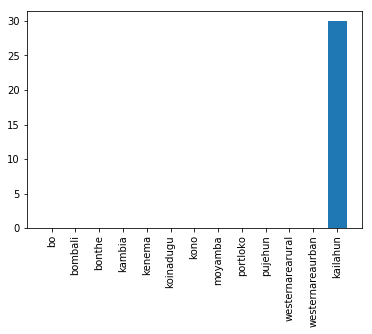

Total cases = 17
Number of district jumps = 0
Number of households involved = 3
Number of cases per household = 5.666666666666667


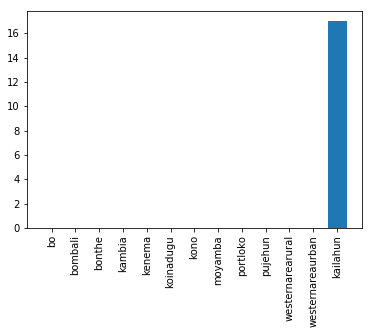

Total cases = 4
Number of district jumps = 0
Number of households involved = 3
Number of cases per household = 1.3333333333333333


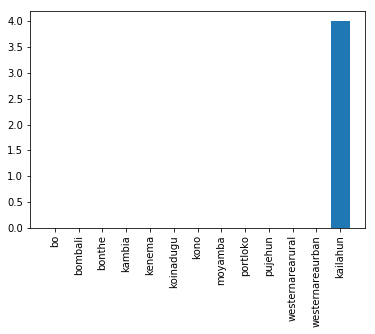

Total cases = 16
Number of district jumps = 0
Number of households involved = 3
Number of cases per household = 5.333333333333333


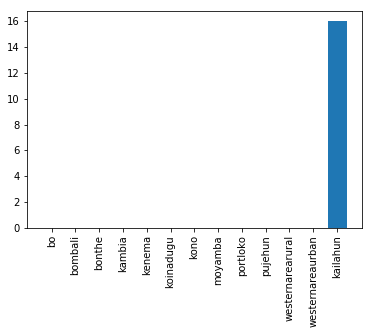

Total cases = 28
Number of district jumps = 0
Number of households involved = 3
Number of cases per household = 9.333333333333334


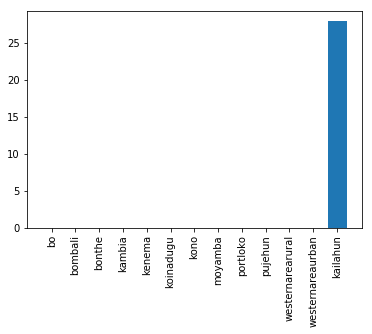

Total cases = 21
Number of district jumps = 0
Number of households involved = 3
Number of cases per household = 7.0


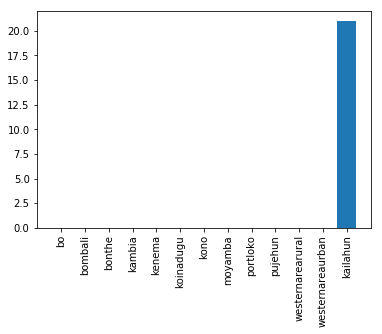

Total cases = 21
Number of district jumps = 0
Number of households involved = 3
Number of cases per household = 7.0


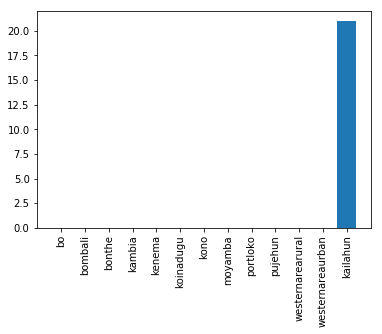

Total cases = 23
Number of district jumps = 0
Number of households involved = 3
Number of cases per household = 7.666666666666667


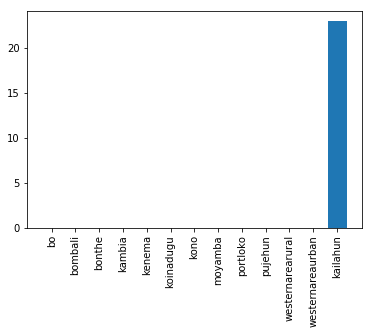

Total cases = 54
Number of district jumps = 0
Number of households involved = 6
Number of cases per household = 9.0


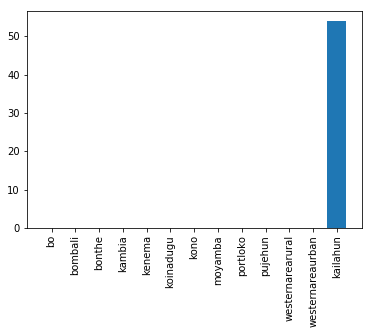

Total cases = 21
Number of district jumps = 0
Number of households involved = 3
Number of cases per household = 7.0


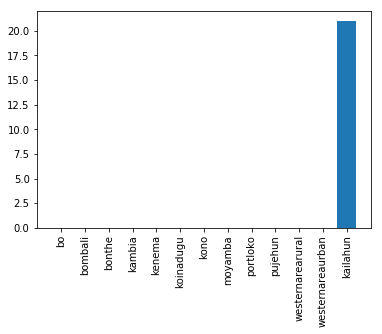

Total cases = 4
Number of district jumps = 0
Number of households involved = 1
Number of cases per household = 4.0


KeyboardInterrupt: 

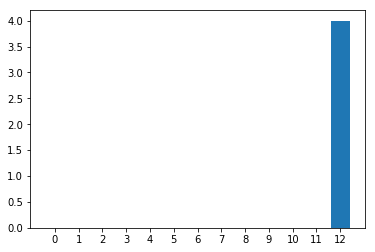

In [129]:
simulation_run("optimised_run/log_files/")

Counter({1.8849056603773584: 1})
1.8849056603773584


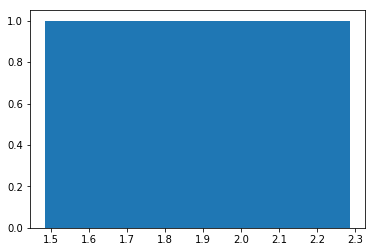

In [14]:
cases_per_hh = Counter()

for item in household_average_calc:
    cases_per_hh[item] += 1
    
x = []
y = []

print(cases_per_hh)

for key, value in cases_per_hh.items():
    x.append(key)
    y.append(value)
    
    
plt.bar(x,y)

sum_of_numbers = sum(number*count for number, count in cases_per_hh.items())
count = sum(count for n, count in cases_per_hh.items())
mean = sum_of_numbers / count

print(mean)


In [108]:
print(sizes)
print(within_cluster_dist)

[3, 19, 22, 13, 4, 16, 22, 13, 3, 17, 4, 10, 5, 3, 8, 4, 3, 5, 5, 5, 7, 8, 4, 4, 10, 4, 4, 4, 4, 5, 4, 8, 3, 3, 3, 8, 3, 4, 3, 12, 3, 9, 6, 3, 9, 3, 20, 11, 8, 11]
[1, 8, 10, 5, 2, 7, 12, 6, 1, 10, 2, 7, 3, 2, 4, 2, 2, 0, 2, 3, 5, 6, 2, 1, 6, 2, 1, 2, 1, 4, 1, 4, 0, 0, 2, 4, 2, 2, 1, 5, 2, 5, 2, 1, 4, 1, 10, 5, 3, 6]


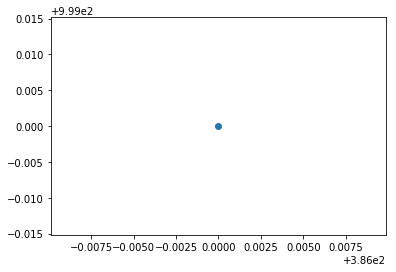

In [15]:
x = within_cluster_dist
y = sizes

plt.scatter(x,y)


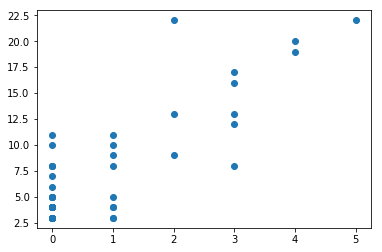

In [100]:
x = between_cluster_dist
y = sizes

plt.scatter(x,y)

In [16]:
cluster_jumps_dist = Counter()

for item in cluster_dist:
    cluster_jumps_dist[item] += 1
    
x = []
y = []

for key, value in cluster_jumps_dist.items():
    x.append(key)
    y.append(value)
    
    
plt.bar(x,y)

# sum_of_numbers = sum(number*count for number, count in cases_per_cluster.items())
# count = sum(count for n, count in cases_per_cluster.items())
# mean = sum_of_numbers / count

# print(mean)



NameError: name 'cluster_dist' is not defined

4.302666666666666


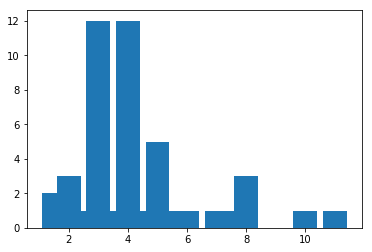

In [102]:
cases_per_cluster = Counter()

for item in cluster_average:
    cases_per_cluster[item] += 1
    
x = []
y = []

for key, value in cases_per_cluster.items():
    x.append(key)
    y.append(value)
    
    
plt.bar(x,y)

sum_of_numbers = sum(number*count for number, count in cases_per_cluster.items())
count = sum(count for n, count in cases_per_cluster.items())
mean = sum_of_numbers / count

print(mean)



In [103]:
print(cluster_average)

[1.5, 3.8, 3.6666666666666665, 3.25, 4.0, 4.0, 7.333333333333333, 4.333333333333333, 3.0, 4.25, 2.0, 10.0, 5.0, 3.0, 2.0, 4.0, 3.0, 2.5, 5.0, 5.0, 7.0, 8.0, 4.0, 4.0, 5.0, 4.0, 4.0, 4.0, 2.0, 5.0, 4.0, 4.0, 1.5, 3.0, 3.0, 8.0, 3.0, 4.0, 3.0, 3.0, 3.0, 4.5, 6.0, 3.0, 3.0, 3.0, 4.0, 11.0, 8.0, 5.5]


In [104]:
print(index_case_check)
print(index_dist_check)

['3022', '2146', '870', '2502', '3426', '4396', '1275', '4058', '45', '3052', '4160', '1036', '1757', '4288', '4789', '2221', '4241', '4846', '4421', '4360', '4433', '1589', '3366', '1133', '164', '70', '4390', '1811', '3912', '3808', '1626', '3139', '543', '3699', '4971', '2430', '3837', '3510', '4742', '3646', '4443', '4886', '1110', '3340', '209', '4562', '1812', '10', '3375', '1357']
['District6', 'District4', 'District1', 'District5', 'District6', 'District8', 'District2', 'District8', 'District0', 'District6', 'District8', 'District2', 'District3', 'District8', 'District9', 'District4', 'District8', 'District9', 'District8', 'District8', 'District8', 'District3', 'District6', 'District2', 'District0', 'District0', 'District8', 'District3', 'District7', 'District7', 'District3', 'District6', 'District1', 'District7', 'District9', 'District4', 'District7', 'District7', 'District9', 'District7', 'District8', 'District9', 'District2', 'District6', 'District0', 'District9', 'District3